# Histogram equalization
---

Using the following algorithm, implement histogram equalization:

1. Calculate normalized histogram: Normalization is performed by dividing the frequency of each bin by the total number of pixels in the image.
2. Cumulative distribution function of the histogram: Find the cumulative sum of the normalized histogram:

    $\sum_{i=0}^j P_x(i)$

    Where $P_x$ is the normalized histogram.

3. Derive intensity-mapping lookup table: Map the new pixel intensities to each pixel of the image. For each discrete intensity level i, the mapped pixel value is calculated from the normalized cumulative histogram according to:

    ```mapped_pixel_value(i) = (L-1)*normalized_cumulative_histogram(i)```

    Where L = 256 for a typical 8-bit unsigned integer representation of pixel intensity.

4. Transform pixel intensity of the original image with the lookup table: Create a new image based on the lookup table.

In [174]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
import math


In [175]:
# TODO: Implment all the functions needed to perform histogram equalization. Test your functions on the following image. Plot the image, the equalized version of the image, and the histograms of both the original and the equalized image.

def normalaizedHistogram(hist, image):
    pixels = image.shape[1] * image.shape[0]
    for index in range(0,len(hist)):
        hist[index] = hist[index] / pixels
    return hist

def cumulativeDistribution(hist):
    cumulative_distribution = []
    acumulated_sum = 0
    for index in range(0,len(hist)):
        acumulated_sum += hist[index][0]
        cumulative_distribution.append([acumulated_sum])
    return cumulative_distribution 

def intensityMappingTable(cumulative, L):
    mapped_pixel_values = []
    L = len(cumulative)
    for index in range(0, len(cumulative)):
        value = math.floor(((L-1) * cumulative[index][0]))
        mapped_pixel_values.append((value))
    return mapped_pixel_values
        
def intensityTransformation(image, pixel_values):
    for index_row in range(0, image.shape[1]):
        for index_col in range(0, image.shape[0]):
            actual_value = image[index_col][index_row]
            image[index_col][index_row] =  pixel_values[actual_value]
    return image

def executionFunction(hist, image, L):
    normalaized_histogram = normalaizedHistogram(hist, image)
    #print(normalaized_histogram)
    cumulative_distribution = cumulativeDistribution(normalaized_histogram)
    #print(cumulative_distribution)
    mapped_pixel_values = intensityMappingTable(cumulative_distribution, L)
    #print(mapped_pixel_values)
    adjusted_image = intensityTransformation(image, mapped_pixel_values)
    return adjusted_image
    

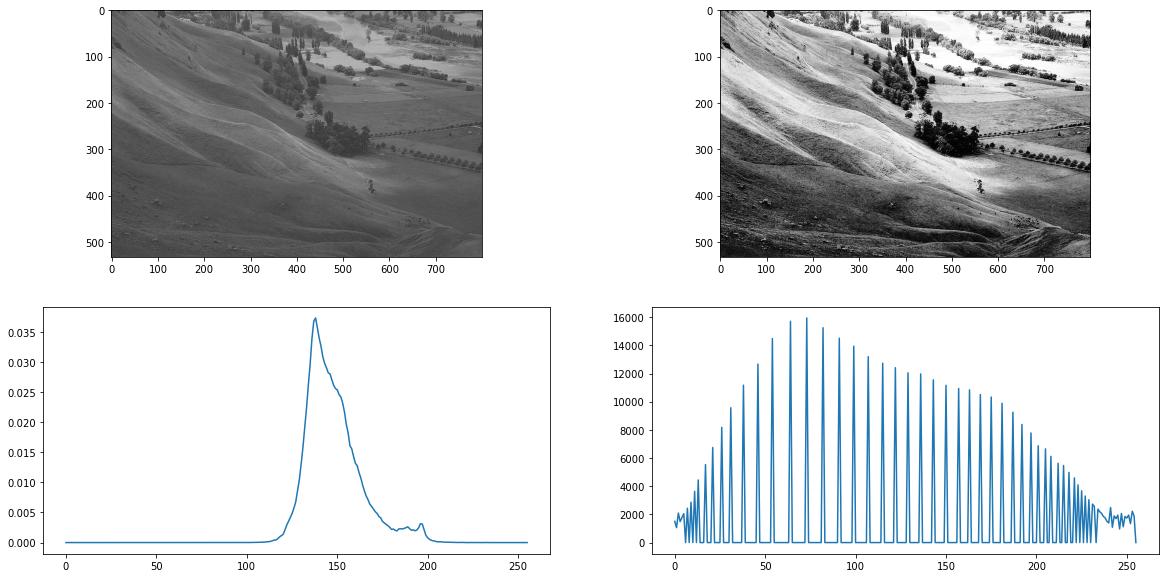

In [182]:
image = cv2.imread('images/Hawkes_Bay_NZ.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

new_image = np.copy(image)
equalized_image = executionFunction(hist, new_image, 256)
equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

images = [image, equalized_image]
histograms = [hist, equalized_hist]

f, subplots = plt.subplots(2, 2, figsize=(20,10))
for i in range(2):
    subplots[0][i].imshow(images[i], cmap="gray")
    subplots[1][i].plot(histograms[i])


Text(0.5, 1.0, 'Implementación Propia')

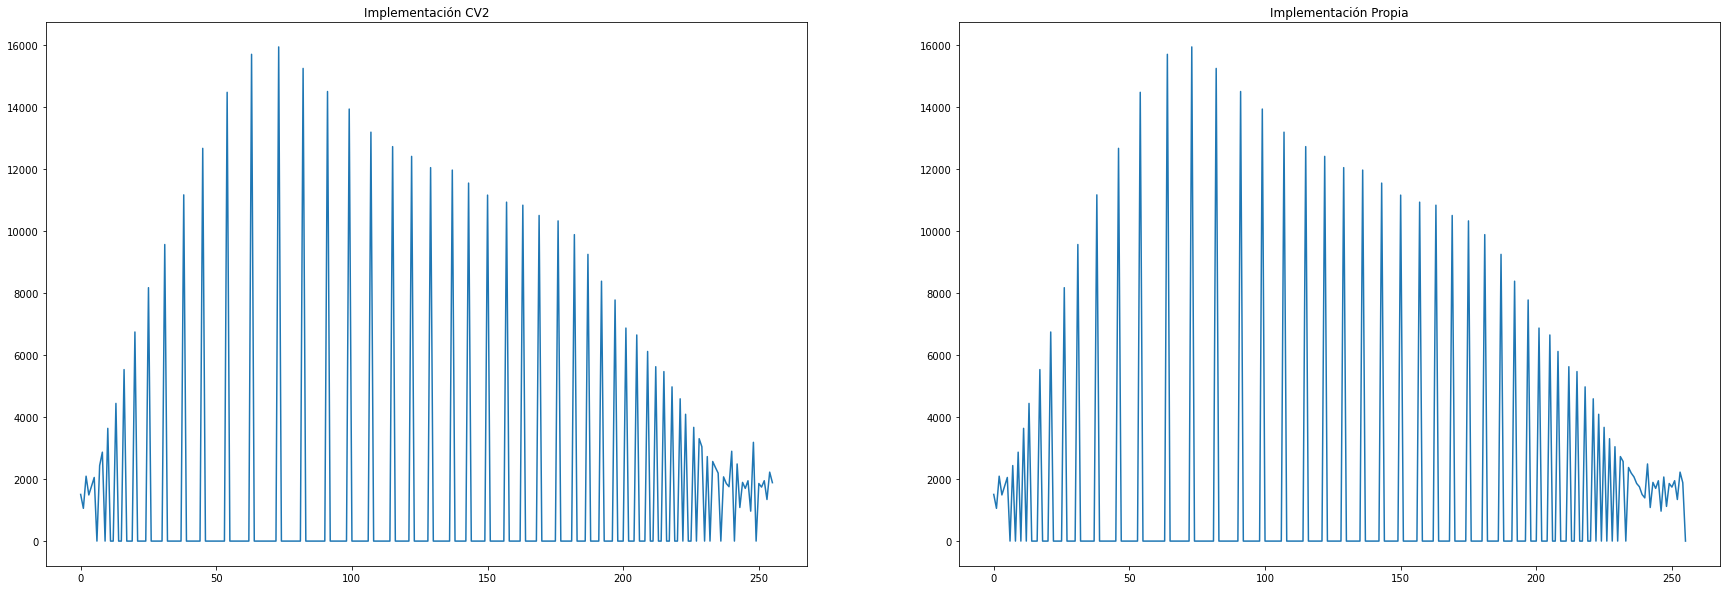

In [183]:
# TODO: Compare your results with the OpenCV implementation of histogram equalization. Plot the histogram of the equalized image with your implementation and the histogram of the equalized image with OpenCV's implementation.
hist = cv2.equalizeHist(equalized_image)
cv2_equalized_hist = cv2.calcHist([hist], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))

ax1.plot(cv2_equalized_hist)
ax1.set_title("Implementación CV2")
ax2.plot(equalized_hist)
ax2.set_title("Implementación Propia")


Text(0.5, 1.0, 'Ecualización B')

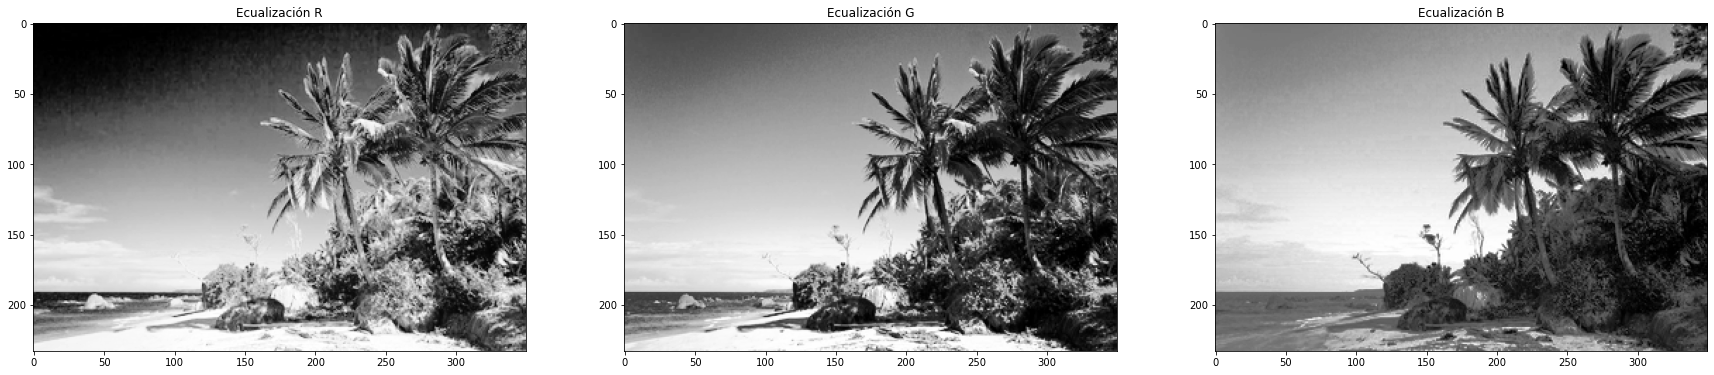

In [178]:
# TODO: Apply your function and do histogram equalization on a color image. Apply the equalization on an RGB image first. Then on the HSV version of the image. Plot a figure with each resulting image. NOTE: for Hue, the range of values goes from 0 to 180, while S and V, go from 0 to 255.(enfoque en S y V)
beach_image = cv2.imread('images/beach.png')
beach_image = cv2.cvtColor(beach_image, cv2.COLOR_BGR2RGB)
rgb_image = np.copy(beach_image)

R, G, B = cv2.split(rgb_image)
rgb_hists = [cv2.calcHist([R], [0], None, [256], [0, 256]),
            cv2.calcHist([G], [0], None, [256], [0, 256]),
            cv2.calcHist([B], [0], None, [256], [0, 256])]

equalized_image_R = executionFunction(rgb_hists[0], R, 256)
equalized_image_G = executionFunction(rgb_hists[1], G, 256)
equalized_image_B = executionFunction(rgb_hists[2], B, 256)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(equalized_image_R, cmap="gray")
ax1.set_title("Ecualización R")
ax2.imshow(equalized_image_G, cmap="gray")
ax2.set_title("Ecualización G")
ax3.imshow(equalized_image_B, cmap="gray")
ax3.set_title("Ecualización B")


Text(0.5, 1.0, 'Ecualización V')

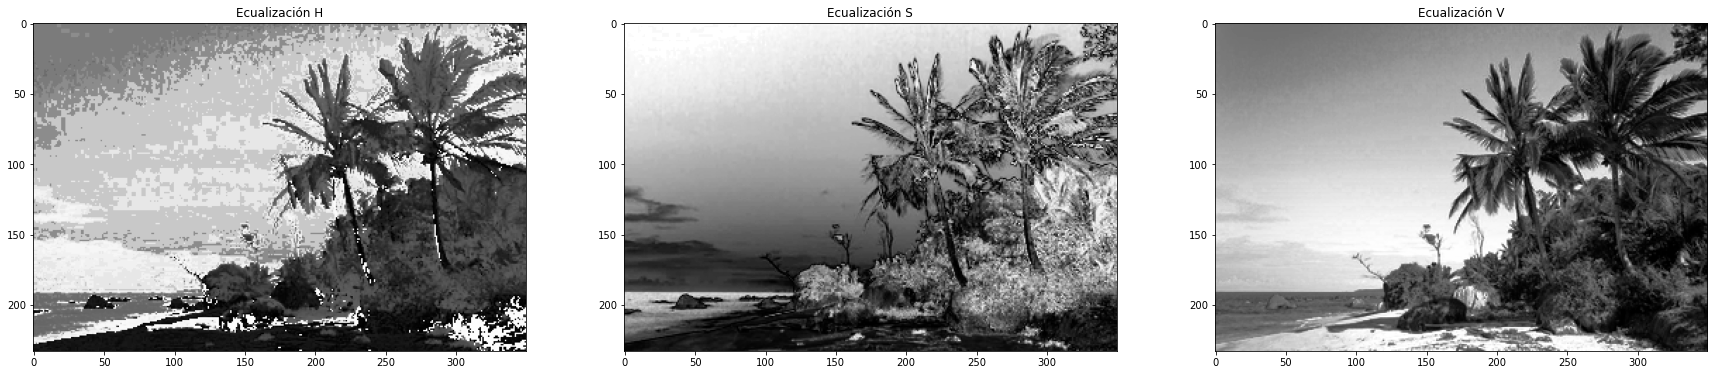

In [179]:
hsv_image = np.copy(beach_image)
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_RGB2HSV)

H, S, V = cv2.split(hsv_image)
hsv_hists = [cv2.calcHist([H], [0], None, [181], [0, 181]),
            cv2.calcHist([S], [0], None, [256], [0, 256]),
            cv2.calcHist([V], [0], None, [256], [0, 256])]

equalized_image_H = executionFunction(hsv_hists[0], H, 181) #DUDA
equalized_image_S = executionFunction(hsv_hists[1], S, 256)
equalized_image_V = executionFunction(hsv_hists[2], V, 256)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.imshow(equalized_image_H, cmap="gray")
ax1.set_title("Ecualización H")
ax2.imshow(equalized_image_S, cmap="gray")
ax2.set_title("Ecualización S")
ax3.imshow(equalized_image_V, cmap="gray")
ax3.set_title("Ecualización V")

Text(0.5, 1.0, 'HSV (Sólo S y V) Ecualizada')

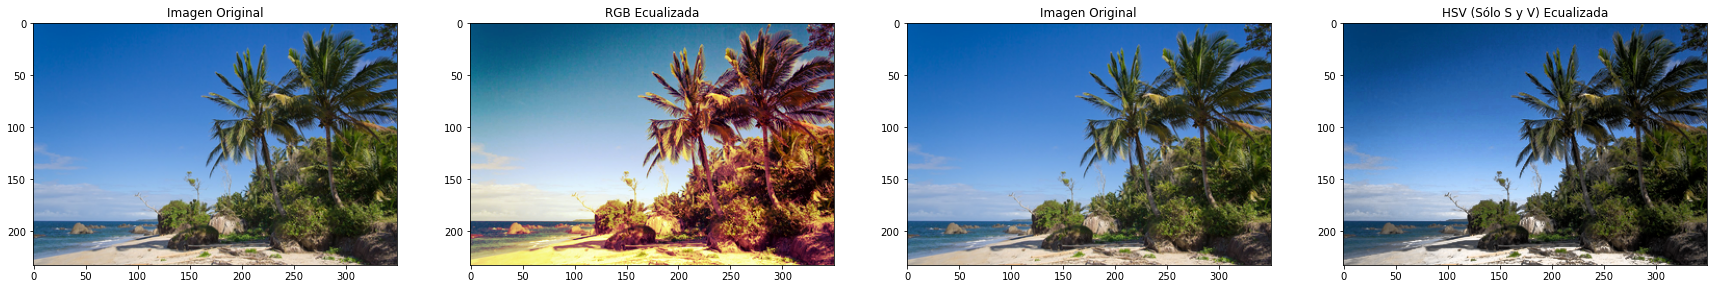

In [180]:
rgb_image_equalized = cv2.merge([equalized_image_R, equalized_image_G, equalized_image_B])
hsv_image_equalized_without_H = cv2.merge([hsv_image[:,:,0], equalized_image_S, equalized_image_V])

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30,10))
ax1.imshow(beach_image)
ax1.set_title("Imagen Original")
ax2.imshow(rgb_image_equalized)
ax2.set_title("RGB Ecualizada")
ax3.imshow(beach_image)
ax3.set_title("Imagen Original")
hsv_image_equalized_without_H = cv2.cvtColor(hsv_image_equalized_without_H, cv2.COLOR_HSV2RGB)
ax4.imshow(hsv_image_equalized_without_H)
ax4.set_title("HSV (Sólo S y V) Ecualizada")

In [181]:
# TODO: For each of the images of people in the image folder, apply histogram equalization, and then detect faces with haar cascades. For each image, plot the result of the face detection without applying histogram equalization, and after applying histogram equalization. 
face_cascade = cv2.CascadeClassifier()
if not face_cascade.load('haar_cascades/haarcascade_frontalface_default.xml'):
    print("Error loading cascade classifier")
else:
    print("Classifier loaded correctly")



Classifier loaded correctly
